## Cleaning data, removing unnecessary characters from reviewsand remove duplicated reviews, calculate the polarity of reviews and creates the Wordloud and Pie diagram

### Import Packages

In [1]:
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt
import textblob

import MySQLdb, pickle
from sqlalchemy import create_engine

In [5]:

# Read reviews from MySQL at Amazon Web Service Cloud 
pw = pickle.load(open('pw.plk','rb'))

db = MySQLdb.connect(
    "127.0.0.1",
    "root",
    pw,
    "flight",
    charset='utf8',
)

# SQL Query
SQL_QUERY = """
    SELECT *
    FROM flight;
"""

# Bring reviews from MySQL into dataframe
reviews = pd.read_sql(SQL_QUERY, db)
reviews.head()

,index,reviews,airlines
0,0,✅ Trip Verified | Washington to Manchester NH...,American Airline
1,1,✅ Trip Verified | Philadelphia to Phoenix. The...,American Airline
2,2,Not Verified | Seattle to Miami. Terrible exp...,American Airline
3,3,✅ Trip Verified | American has an awards prog...,American Airline
4,4,✅ Trip Verified | Phoenix to Los Angeles. If ...,American Airline


### Data Preprocessing

### Reindexing the data frame

In [6]:
reviews.index = range(len(reviews.index))

### Remove duplicated reviews

In [7]:
reviews.drop_duplicates('reviews',keep='last',inplace=True)

### Remove "Trip Verified | " and "Not Verified | " substring from beginning of some reviews

In [9]:
reviews['reviews'] = reviews.reviews.apply(lambda s: s[str(s).find("|")+1:len(s)])

### Remove \t,\'t,\'s,"],'],\', [", [' and \\t\\t\\t

In [11]:
reviews['reviews']=reviews.reviews.apply(lambda s:s.replace("\t"," "))
reviews['reviews']=reviews.reviews.apply(lambda s:s.replace("\'t"," "))
reviews['reviews']=reviews.reviews.apply(lambda s:s.replace("\'s"," "))
reviews['reviews']=reviews.reviews.apply(lambda s:s.replace("[\"",""))
reviews['reviews']=reviews.reviews.apply(lambda s:s.replace("[\'",""))
reviews['reviews']=reviews.reviews.apply(lambda s:s.replace("\"]",""))
reviews['reviews']=reviews.reviews.apply(lambda s:s.replace("\']",""))
reviews['reviews']=reviews.reviews.apply(lambda s:s.replace("\'",""))
reviews['reviews']=reviews.reviews.apply(lambda s:s.replace("\\t\\t\\t"," "))

In [13]:
print(reviews.reviews[0:5])

0      Washington to Manchester NH. Flight delayed ...
1     Philadelphia to Phoenix. The Philadelphia air...
2      Seattle to Miami. Terrible experience on bot...
3      American has an awards program that is just ...
4      Phoenix to Los Angeles. If you have disabili...
Name: reviews, dtype: object


### Calculate the polarity of reviews

In [14]:
t=textblob.TextBlob(reviews.reviews[0])

In [15]:
reviews['opinion']=reviews.reviews.apply(lambda s:textblob.TextBlob(s).sentiment[0])
reviews['opinion'] =reviews.opinion.apply(lambda x: "Positive" if x>0 else "Neutral" if x ==0 else "Negative")

### Define a function to show a WordCloud

In [17]:
def create_wordCloud(data,airline,opinion):
    my_stop_words = STOPWORDS.update(['American','Delta','Airline','Airlines','used','many','MUCH','know','flight','via'])  
    word_cloud = WordCloud(background_color="white",stopwords=my_stop_words).generate(str(data['reviews'])) 
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.title(airline+" "+opinion+" Reviews",fontsize=12)
    plt.axis("off")
    plt.show()

### Define a function to show a pie chart

In [18]:
def show_pie_chart(data,airline):
    labels = ["Positive","Negative","Neutral"]
    sizes = [len(data[data.opinion=="Positive"])/len(data)*100,len(data[data.opinion=="Negative"])/len(data)*100,len(data[data.opinion=="Neutral"])/len(data)*100]
    explode = (0.1, 0, 0)  
    fig1, ax1 = plt.subplots()
    plt.pie(sizes, autopct='%1.1f%%',shadow=True,startangle=True, explode=explode)
    plt.tight_layout()
    plt.suptitle(airline +" pie chart",fontsize=12)
    ax1.legend(labels,bbox_to_anchor=(-0.2, 0.2, 0.7, 0.5))
    plt.show()

### Show the wordCloud for positive and negative reviews for each airlines

In [19]:
american_positive_data = reviews[(reviews.airlines=="American Airline") &(reviews.opinion=="Positive")]
american_negative_data = reviews[(reviews.airlines=="American Airline") &(reviews.opinion=="Negative")]
delta_positive_data = reviews[(reviews.airlines=="Delta Airline") &(reviews.opinion=="Positive")]
delta_negative_data = reviews[(reviews.airlines=="Delta Airline") &(reviews.opinion=="Negative")]

In [20]:
american_positive_data.head()

,index,reviews,airlines,opinion
1,1,Philadelphia to Phoenix. The Philadelphia air...,American Airline,Positive
3,3,American has an awards program that is just ...,American Airline,Positive
4,4,Phoenix to Los Angeles. If you have disabili...,American Airline,Positive
5,5,Jacksonville to Salt Lake City. So we usuall...,American Airline,Positive
8,8,Washington to Phoenix. American Airlines hir...,American Airline,Positive


In [21]:
american_negative_data.head()

,index,reviews,airlines,opinion
2,2,Seattle to Miami. Terrible experience on bot...,American Airline,Negative
6,6,Las Vegas to Chicago. Worst travel experienc...,American Airline,Negative
7,7,Dallas to Phoenix. Worst service ever! Proce...,American Airline,Negative
10,10,Columbus to Dallas Fort-Worth with American A...,American Airline,Negative
11,11,I realized after booking that I needed to ar...,American Airline,Negative


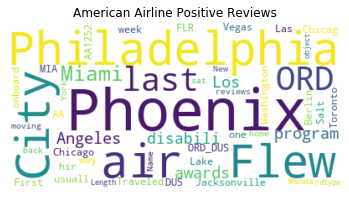

In [22]:
create_wordCloud(american_positive_data,"American Airline","Positive")

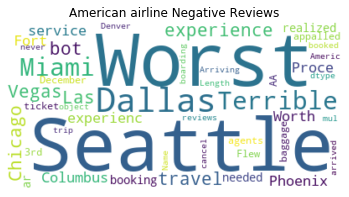

In [23]:
#american_negative_data
create_wordCloud(american_negative_data,"American airline","Negative")

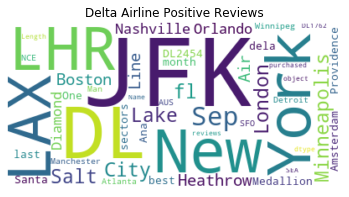

In [24]:
create_wordCloud(delta_positive_data,"Delta Airline","Positive")

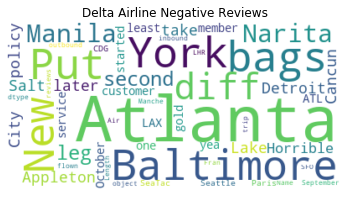

In [25]:
create_wordCloud(delta_negative_data,"Delta Airline","Negative")

### Create a pie chart for each airlines

In [26]:
reviews_american = reviews[reviews.airlines=="American Airline"]
reviews_delta = reviews[reviews.airlines=="Delta Airline"]

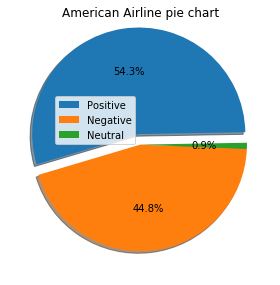

In [27]:
show_pie_chart(reviews_american,"American Airline")

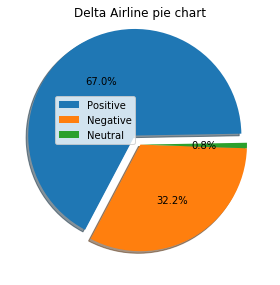

In [28]:
show_pie_chart(reviews_delta,"Delta Airline")